<a href="https://colab.research.google.com/github/ProAryam-X100/AI-MindMap-Generator/blob/main/MindMap_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install libraries related to text analysis (NLTK), graphics (NetworkX), and data visualization (Matplotlib)
!pip install networkx matplotlib nltk
import nltk #Library dedicated to natural language processing
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
"""
Summary of the libraries used:
1. NetworkX (nx): Used for creating graphs and analyzing networks, including nodes and edges.
2. Matplotlib (plt): A library for data visualization and creating plots.
3. NLTK (Natural Language Toolkit):
   - sent_tokenize: Used for splitting text into sentences (Sentence Tokenization).
   - download: To download the linguistic resources and datasets required by the NLTK library.
"""
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
from nltk import download

# Download resources from the NLTK library
download('punkt')

# Analyze text into main and sub-ideas
def analyze_text_to_ideas(text):
    sentences = sent_tokenize(text)
    ideas = {"Main Topic": []}

    for i, sentence in enumerate(sentences, 1):
        if i == 1:
            ideas["Main Topic"].append(sentence)
        else:
            if "Main Topic" not in ideas:
                ideas["Main Topic"] = []
            ideas["Main Topic"].append(sentence)

    return ideas

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def create_and_save_mind_map(ideas, save_as="png"):
    # Create a chart
    graph = nx.DiGraph()

    #  add (Nodes)
    main_topic = list(ideas.keys())[0]
    graph.add_node(main_topic, size=3000, color='red')

    for sub_topic in ideas[main_topic]:
        graph.add_node(sub_topic, size=2000, color='blue')
        graph.add_edge(main_topic, sub_topic)

    # View map
    pos = nx.spring_layout(graph)
    sizes = [graph.nodes[node]['size'] for node in graph]
    colors = [graph.nodes[node]['color'] for node in graph]

    plt.figure(figsize=(10, 7))
    nx.draw(
        graph, pos, with_labels=True,
        node_size=sizes, node_color=colors,
        font_size=10, font_weight='bold'
    )

In [ ]:
import random

def create_and_save_enhanced_mind_map(ideas, save_as="png"):
    # Create a chart
    graph = nx.DiGraph()

    # Contract preparation
    main_topic = list(ideas.keys())[0]
    graph.add_node(main_topic, size=4000, color='#FF6347', font_color='white')  # Light red color

    sub_colors = ['#87CEEB', '#FFD700', '#90EE90', '#FFB6C1', '#9370DB']  # Distinctive sub-colors

    for i, sub_topic in enumerate(ideas[main_topic]):
        color = random.choice(sub_colors)  # Choose a random color for each idea
        graph.add_node(sub_topic, size=3000, color=color, font_color='black')
        graph.add_edge(main_topic, sub_topic)

    # Drawing shape setting
    pos = nx.spring_layout(graph, seed=42)  # Fixed order of nodes
    sizes = [graph.nodes[node]['size'] for node in graph]
    colors = [graph.nodes[node]['color'] for node in graph]
    font_colors = [graph.nodes[node].get('font_color', 'black') for node in graph]

    plt.figure(figsize=(12, 8))
    nx.draw(
        graph, pos,
        with_labels=True,
        labels={node: node for node in graph.nodes},
        node_size=sizes,
        node_color=colors,
        font_size=12,
        font_weight='bold',
        edge_color="#708090",  # Dark gray for edges
        width=2
    )

    # Optimize texts with a custom font
    for node, (x, y) in pos.items():
        plt.text(
            x, y, s=node,
            bbox=dict(facecolor=graph.nodes[node]['color'], alpha=0.8, boxstyle="round,pad=0.3"),
            horizontalalignment='center', fontsize=10, color=graph.nodes[node].get('font_color', 'black')
        )

    # Save map
    if save_as == "png":
        plt.savefig("enhanced_mind_map.png", format="png")
    elif save_as == "pdf":
        from matplotlib.backends.backend_pdf import PdfPages
        pdf = PdfPages("enhanced_mind_map.pdf")
        pdf.savefig()
        pdf.close()

    plt.show()

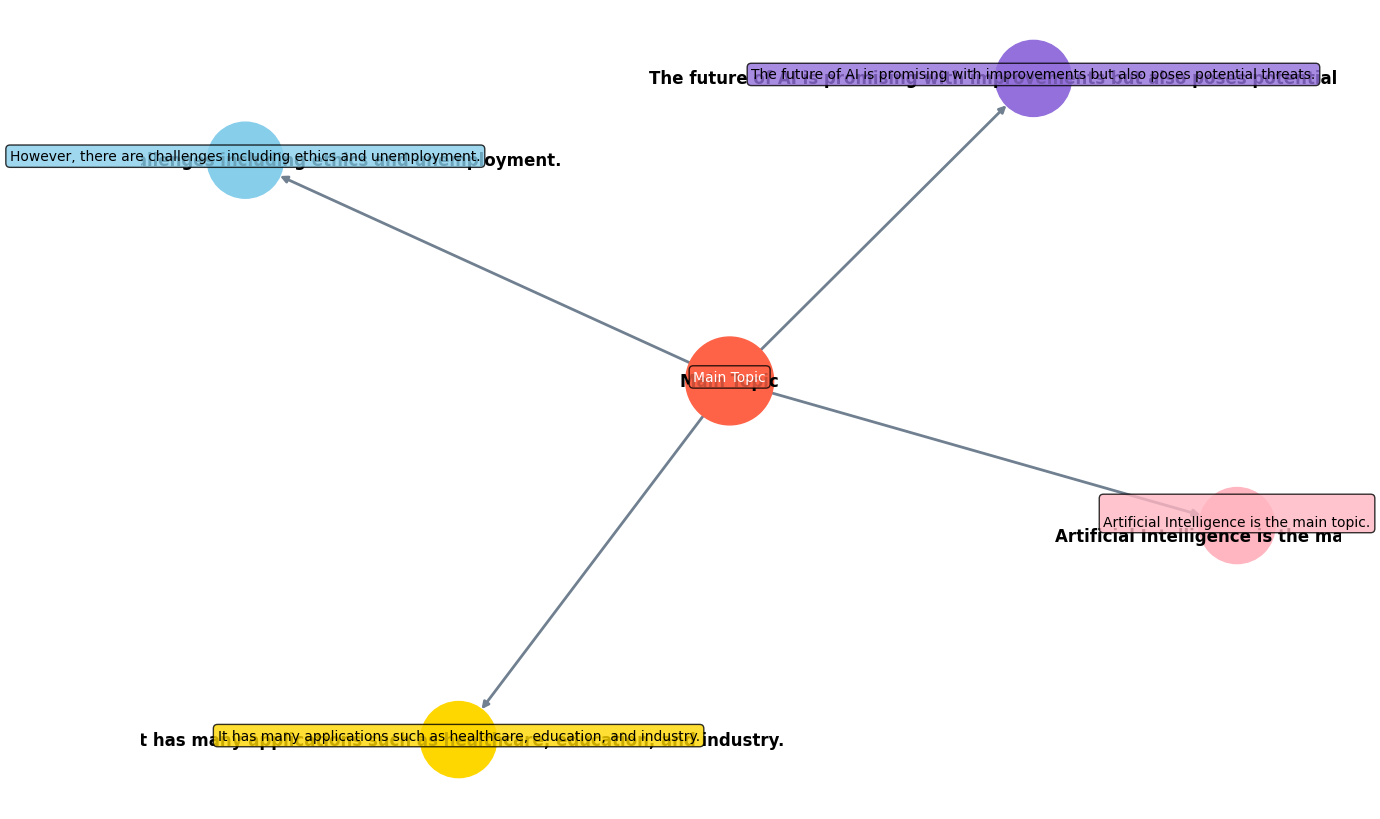

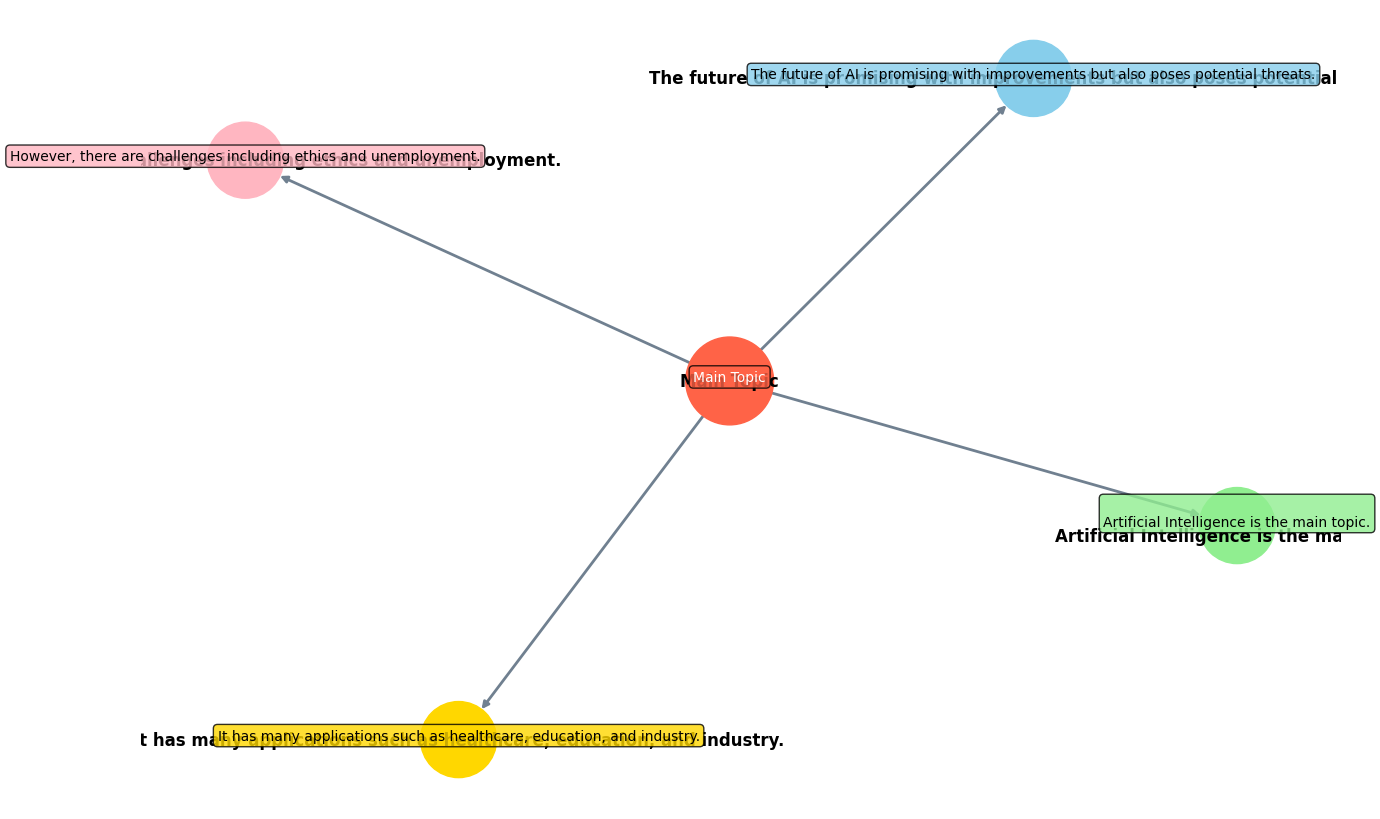

In [ ]:
# Text input
text = """
Artificial Intelligence is the main topic. It has many applications such as healthcare, education, and industry.
However, there are challenges including ethics and unemployment. The future of AI is promising with improvements but also poses potential threats.
"""

# Text to ideas
ideas = analyze_text_to_ideas(text)

# Create an enhanced mind map and save it as an image
create_and_save_enhanced_mind_map(ideas, save_as="png")

# Or save as PDF
create_and_save_enhanced_mind_map(ideas, save_as="pdf")

In [ ]:
from IPython.display import display
import ipywidgets as widgets

# Setting up the input interface
text_input = widgets.Textarea(
    value="Artificial Intelligence is the main topic. It has many applications such as healthcare, education, and industry. However, there are challenges including ethics and unemployment. The future of AI is promising with improvements but also poses potential threats.",
    placeholder="Enter your text here...",
    description="Text Input:",
    layout=widgets.Layout(width='100%', height='200px')
)

output_format = widgets.Dropdown(
    options=['png', 'pdf'],
    value='png',
    description='Export as:',
)

generate_button = widgets.Button(
    description="Generate Mind Map",
    button_style='success',
    tooltip="Click to generate the mind map",
    icon='check'
)

output_area = widgets.Output()

# Show interface
display(widgets.VBox([text_input, output_format, generate_button, output_area]))
